## Patient-level data split for CHOL

In [1]:
# import packages

import pandas as pd
import numpy as np
#import random
import matplotlib.pyplot as plt
import seaborn as sns
#from google.cloud import bigquery
from deep_nexus.preprocess_images import random_split

In [2]:
# the following cell is to generate a dataframe containing slides information
# take CHOL with higher than 95% purity as an example

In [3]:
%%bigquery df
SELECT case_barcode, sample_barcode, disease_code, sample_type_name, avg_percent_tumor_cells, file_gcs_url
FROM `deep-nexus.tcga.TCGA_slides_metadata`
WHERE is_ffpe ='NO' AND disease_code='CHOL' AND (sample_type_name='Solid Tissue Normal' OR avg_percent_tumor_cells>95)

In [4]:
# add mutation_states and check df

df['mutation_states'] = np.nan
df.head()

,case_barcode,sample_barcode,disease_code,sample_type_name,avg_percent_tumor_cells,file_gcs_url,mutation_states
0,TCGA-W7-A93N,TCGA-W7-A93N-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/1f32d4ce-23c4-4ee...,NaN
1,TCGA-W5-AA2U,TCGA-W5-AA2U-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/55bdc66e-26e7-470...,NaN
2,TCGA-W5-AA33,TCGA-W5-AA33-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/8c780832-2217-4ba...,NaN
3,TCGA-W5-AA2R,TCGA-W5-AA2R-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/890c1e2a-8085-423...,NaN
4,TCGA-W7-A93O,TCGA-W7-A93O-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/76b13753-1729-4fd...,NaN


In [5]:
# do patient-level data split
# random_split function receives a dataframe df containing slide_id and patient_id
# train and valid ratio are set to 0.70 and 0.15 as default
# seed is set to 42 as default

train_df, test_df, valid_df = random_split(df, train_prop = 0.70, test_prop = 0.15, valid_prop = 0.15, seed = 42)

The length of train_df: 24.
The length of test_df: 5.
The length of valid_df: 6.


In [6]:
# get sample barcodes

train_slide = list(train_df['sample_barcode'])
test_slide = list(test_df['sample_barcode'])
valid_slide = list(valid_df['sample_barcode'])

In [7]:
print("train set, length = {}".format(len(train_slide)))
print(train_slide)
print("test set, length = {}".format(len(test_slide)))
print(test_slide)
print("valid set, length = {}".format(len(valid_slide)))
print(valid_slide)

train set, length = 24
['TCGA-W7-A93N-11A', 'TCGA-W5-AA2U-11A', 'TCGA-W5-AA33-11A', 'TCGA-W5-AA2R-11A', 'TCGA-W7-A93O-11A', 'TCGA-W5-AA2X-11A', 'TCGA-W5-AA31-11A', 'TCGA-W5-AA30-11A', 'TCGA-W5-AA34-11A', 'TCGA-ZU-A8S4-11A', 'TCGA-ZK-AAYZ-01A', 'TCGA-W6-AA0T-01A', 'TCGA-W6-AA0S-01A', 'TCGA-W5-AA33-01A', 'TCGA-4G-AAZR-11A', 'TCGA-4G-AAZT-11A', 'TCGA-4G-AAZO-11A', 'TCGA-W5-AA2R-01A', 'TCGA-YR-A95A-01A', 'TCGA-W5-AA2G-01A', 'TCGA-3X-AAVB-01A', 'TCGA-ZH-A8Y1-01A', 'TCGA-ZH-A8Y5-01A', 'TCGA-ZH-A8Y4-01A']
test set, length = 5
['TCGA-W5-AA2T-11A', 'TCGA-W5-AA2O-11A', 'TCGA-W5-AA2I-11A', 'TCGA-4G-AAZF-11A', 'TCGA-ZH-A8Y3-01A']
valid set, length = 6
['TCGA-W5-AA2Z-11A', 'TCGA-W5-AA2Q-11A', 'TCGA-W7-A93P-11A', 'TCGA-W7-A93P-01A', 'TCGA-ZH-A8Y6-01A', 'TCGA-ZH-A8Y2-01A']


### If we discard tumor slides with purity no more than 95, get discarded slide IDs.

In [8]:
%%bigquery df_rest
SELECT case_barcode, sample_barcode, disease_code, sample_type_name, avg_percent_tumor_cells, file_gcs_url
FROM `deep-nexus.tcga.TCGA_slides_metadata`
WHERE is_ffpe ='NO' AND disease_code='CHOL' AND sample_type_name='Primary solid Tumor' AND avg_percent_tumor_cells<=95
ORDER BY avg_percent_tumor_cells

In [9]:
df_rest['mutation_states'] = np.nan
df_rest.head()

,case_barcode,sample_barcode,disease_code,sample_type_name,avg_percent_tumor_cells,file_gcs_url,mutation_states
0,TCGA-4G-AAZG,TCGA-4G-AAZG-01A,CHOL,Primary solid Tumor,20.0,gs://gdc-tcga-phs000178-open/dc21b0ca-a36a-448...,NaN
1,TCGA-W5-AA2Z,TCGA-W5-AA2Z-01A,CHOL,Primary solid Tumor,23.0,gs://gdc-tcga-phs000178-open/49863eb4-585d-4d7...,NaN
2,TCGA-ZD-A8I3,TCGA-ZD-A8I3-01A,CHOL,Primary solid Tumor,23.0,gs://gdc-tcga-phs000178-open/6f7026d0-abe8-41a...,NaN
3,TCGA-4G-AAZF,TCGA-4G-AAZF-01A,CHOL,Primary solid Tumor,25.0,gs://gdc-tcga-phs000178-open/ead0d4e4-3601-4ec...,NaN
4,TCGA-W7-A93N,TCGA-W7-A93N-01A,CHOL,Primary solid Tumor,40.0,gs://gdc-tcga-phs000178-open/32ae9e54-cc84-4cc...,NaN


In [10]:
slide_rest = list(df_rest['sample_barcode'])
len(slide_rest)

36

In [11]:
print("discarded slides:")
print(slide_rest)

discarded slides:
['TCGA-4G-AAZG-01A', 'TCGA-W5-AA2Z-01A', 'TCGA-ZD-A8I3-01A', 'TCGA-4G-AAZF-01A', 'TCGA-W7-A93N-01A', 'TCGA-W5-AA2W-01A', 'TCGA-4G-AAZO-01A', 'TCGA-3X-AAVA-01A', 'TCGA-ZU-A8S4-01A', 'TCGA-WD-A7RX-01A', 'TCGA-3X-AAVC-01A', 'TCGA-3X-AAV9-01A', 'TCGA-W5-AA2X-01A', 'TCGA-5A-A8ZF-01A', 'TCGA-W5-AA2T-01A', 'TCGA-W5-AA2M-01A', 'TCGA-W5-AA2J-01A', 'TCGA-W5-AA2Q-01A', 'TCGA-5A-A8ZG-01A', 'TCGA-W7-A93O-01A', 'TCGA-W5-AA36-01A', 'TCGA-4G-AAZT-01A', 'TCGA-W5-AA2H-01A', 'TCGA-W5-AA38-01A', 'TCGA-3X-AAVE-01A', 'TCGA-4G-AAZR-01A', 'TCGA-W5-AA2I-01A', 'TCGA-W5-AA30-01A', 'TCGA-W5-AA2U-01A', 'TCGA-ZH-A8Y8-01A', 'TCGA-W5-AA2O-01A', 'TCGA-W5-AA39-01A', 'TCGA-W5-AA2K-01A', 'TCGA-ZH-A8Y7-01A', 'TCGA-W5-AA34-01A', 'TCGA-W5-AA31-01A']


### Or, we can include those discarded slides in the test and validation sets.

In [12]:
%%bigquery df_full
SELECT case_barcode, sample_barcode, disease_code, sample_type_name, avg_percent_tumor_cells, file_gcs_url
FROM `deep-nexus.tcga.TCGA_slides_metadata`
WHERE is_ffpe ='NO' AND disease_code='CHOL'

In [13]:
df_full['mutation_states'] = np.nan
df_full.head()

,case_barcode,sample_barcode,disease_code,sample_type_name,avg_percent_tumor_cells,file_gcs_url,mutation_states
0,TCGA-W7-A93N,TCGA-W7-A93N-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/1f32d4ce-23c4-4ee...,NaN
1,TCGA-W5-AA2U,TCGA-W5-AA2U-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/55bdc66e-26e7-470...,NaN
2,TCGA-W5-AA33,TCGA-W5-AA33-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/8c780832-2217-4ba...,NaN
3,TCGA-W5-AA2R,TCGA-W5-AA2R-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/890c1e2a-8085-423...,NaN
4,TCGA-W7-A93O,TCGA-W7-A93O-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/76b13753-1729-4fd...,NaN


#### 1. Check purity distribution.

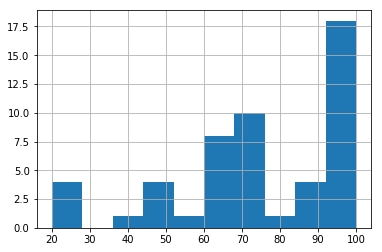

In [14]:
df_full[df_full.sample_type_name=='Primary solid Tumor'].avg_percent_tumor_cells.hist()

#### 2. Reset purity threshold to balance the size of train/test/valid.

In [15]:
%%bigquery df_60
SELECT case_barcode, sample_barcode, disease_code, sample_type_name, avg_percent_tumor_cells, file_gcs_url
FROM `deep-nexus.tcga.TCGA_slides_metadata`
WHERE is_ffpe ='NO' AND disease_code='CHOL' AND (sample_type_name='Solid Tissue Normal' OR avg_percent_tumor_cells>60)

In [16]:
%%bigquery df_60_rest
SELECT case_barcode, sample_barcode, disease_code, sample_type_name, avg_percent_tumor_cells, file_gcs_url
FROM `deep-nexus.tcga.TCGA_slides_metadata`
WHERE is_ffpe ='NO' AND disease_code='CHOL' AND sample_type_name='Primary solid Tumor' AND avg_percent_tumor_cells<=60

In [17]:
df_60['mutation_states'] = np.nan
df_60_rest['mutation_states'] = np.nan

In [18]:
train_df_60, test_df_part1, valid_df_part1 = random_split(df_60, train_prop = 0.70, test_prop = 0.15, valid_prop = 0.15, seed = 42)

The length of train_df: 41.
The length of test_df: 8.
The length of valid_df: 10.


In [19]:
_, test_df_part2, valid_df_part2 = random_split(df_60_rest, train_prop = 0, test_prop = 0.5, valid_prop = 0.5, seed = 42)

The length of train_df: 0.
The length of test_df: 6.
The length of valid_df: 6.


In [20]:
test_df_60 = pd.concat([test_df_part1, test_df_part2], ignore_index=True)
valid_df_60 = pd.concat([valid_df_part1, valid_df_part2], ignore_index=True)

#### 3. Check if `case_barcode` in test & valid sets do not show in train set, otherwise move overlapping ones.

In [21]:
train_case = list(pd.unique(train_df_60['case_barcode']))
test_case = list(pd.unique(test_df_60['case_barcode']))
valid_case = list(pd.unique(valid_df_60['case_barcode']))

In [22]:
len(train_case), len(test_case), len(valid_case)

(31, 13, 12)

In [23]:
test_case_final = [case for case in test_case if case not in train_case]
valid_case_final = [case for case in valid_case if case not in train_case]

In [24]:
len(test_case_final), len(valid_case_final)

(12, 10)

In [25]:
test_df_60 = test_df_60[test_df_60['case_barcode'].isin(test_case_final)]
valid_df_60 = valid_df_60[valid_df_60['case_barcode'].isin(valid_case_final)]

In [26]:
train_slide_60 = list(train_df_60['sample_barcode'])
test_slide_60 = list(test_df_60['sample_barcode'])
valid_slide_60 = list(valid_df_60['sample_barcode'])

In [27]:
print("train set, length = {}".format(len(train_slide_60)))
print(train_slide_60)
print("test set, length = {}".format(len(test_slide_60)))
print(test_slide_60)
print("valid set, length = {}".format(len(valid_slide_60)))
print(valid_slide_60)

train set, length = 41
['TCGA-W7-A93N-11A', 'TCGA-W5-AA2U-11A', 'TCGA-W5-AA33-11A', 'TCGA-W5-AA2Z-11A', 'TCGA-W5-AA2Q-11A', 'TCGA-W5-AA2X-11A', 'TCGA-W5-AA31-11A', 'TCGA-W7-A93P-11A', 'TCGA-W5-AA34-11A', 'TCGA-ZU-A8S4-11A', 'TCGA-W5-AA2I-11A', 'TCGA-ZH-A8Y7-01A', 'TCGA-W5-AA38-01A', 'TCGA-W5-AA34-01A', 'TCGA-ZK-AAYZ-01A', 'TCGA-5A-A8ZG-01A', 'TCGA-W6-AA0T-01A', 'TCGA-3X-AAVE-01A', 'TCGA-W7-A93P-01A', 'TCGA-W5-AA31-01A', 'TCGA-W5-AA39-01A', 'TCGA-W5-AA33-01A', 'TCGA-W5-AA36-01A', 'TCGA-5A-A8ZF-01A', 'TCGA-4G-AAZR-11A', 'TCGA-4G-AAZT-11A', 'TCGA-W5-AA2X-01A', 'TCGA-YR-A95A-01A', 'TCGA-4G-AAZR-01A', 'TCGA-W5-AA2M-01A', 'TCGA-W5-AA2I-01A', 'TCGA-W5-AA2K-01A', 'TCGA-W5-AA2U-01A', 'TCGA-W5-AA2G-01A', 'TCGA-4G-AAZT-01A', 'TCGA-W5-AA2H-01A', 'TCGA-W5-AA2Q-01A', 'TCGA-3X-AAVB-01A', 'TCGA-ZH-A8Y1-01A', 'TCGA-ZH-A8Y5-01A', 'TCGA-ZH-A8Y4-01A']
test set, length = 13
['TCGA-W5-AA30-11A', 'TCGA-ZH-A8Y8-01A', 'TCGA-W6-AA0S-01A', 'TCGA-ZH-A8Y6-01A', 'TCGA-4G-AAZO-11A', 'TCGA-ZH-A8Y2-01A', 'TCGA-W5-AA2J

#### 4. Plot tumor vs normal in each set.

In [28]:
train_type = train_df_60['sample_type_name'].value_counts()
test_type = test_df_60['sample_type_name'].value_counts()
valid_type = valid_df_60['sample_type_name'].value_counts()

In [29]:
df_type = pd.DataFrame([train_type, test_type, valid_type], index=['train', 'test', 'valid'])
df_type

,Primary solid Tumor,Solid Tissue Normal
train,28,13
test,11,2
valid,9,5


Text(0.5, 1.0, 'Tumor/normal slides ditribution after data splits')

<Figure size 720x432 with 0 Axes>

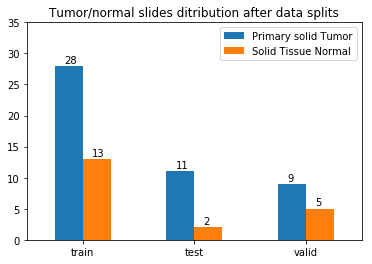

In [30]:
plt.figure(figsize=(10, 6))
ax = df_type.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.08, p.get_height()+0.5))
plt.ylim(0,35)
plt.xticks(rotation=0)
plt.title('Tumor/normal slides ditribution after data splits')

#### 5. Combine three datasets and push the dataframe to BigQuery.

In [31]:
train_df_60['dataset'] = 'train'
test_df_60['dataset'] = 'test'
valid_df_60['dataset'] = 'valid'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
train_test_valid = pd.concat([train_df_60, test_df_60, valid_df_60], ignore_index=True)
train_test_valid.head()

,case_barcode,sample_barcode,disease_code,sample_type_name,avg_percent_tumor_cells,file_gcs_url,mutation_states,dataset
0,TCGA-W7-A93N,TCGA-W7-A93N-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/1f32d4ce-23c4-4ee...,NaN,train
1,TCGA-W5-AA2U,TCGA-W5-AA2U-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/55bdc66e-26e7-470...,NaN,train
2,TCGA-W5-AA33,TCGA-W5-AA33-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/8c780832-2217-4ba...,NaN,train
3,TCGA-W5-AA2Z,TCGA-W5-AA2Z-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/b05f8d6a-73be-40e...,NaN,train
4,TCGA-W5-AA2Q,TCGA-W5-AA2Q-11A,CHOL,Solid Tissue Normal,0.0,gs://gdc-tcga-phs000178-open/c64fa91c-4446-4be...,NaN,train


In [33]:
train_test_valid.to_gbq('tcga.train_test_valid_CHOL', 'deep-nexus', if_exists='replace')

1it [00:09,  9.79s/it]
